# Forecasting Net Prophet

You’re a growth analyst at [MercadoLibre](http://investor.mercadolibre.com/about-us). With over 200 million users, MercadoLibre is the most popular e-commerce site in Latin America. You've been tasked with analyzing the company's financial and user data in clever ways to make the company grow. So, you want to find out if the ability to predict search traffic can translate into the ability to successfully trade the stock.

The instructions for this Challenge are divided into four steps, as follows:

* Step 1: Find unusual patterns in hourly Google search traffic

* Step 2: Mine the search traffic data for seasonality

* Step 3: Relate the search traffic to stock price patterns

* Step 4: Create a time series model with Prophet

The following subsections detail these steps.

## Install and import the required libraries and dependencies

In [318]:
# Install the required libraries
!pip install prophet

In [319]:
# Import the required libraries and dependencies

import pandas as pd
from prophet import Prophet
import datetime as dt
import numpy as np
%matplotlib inline

## Step 1: Find Unusual Patterns in Hourly Google Search Traffic

The data science manager asks if the Google search traffic for the company links to any financial events at the company. Or, does the search traffic data just present random noise? To answer this question, pick out any unusual patterns in the Google search data for the company, and connect them to the corporate financial events.

To do so, complete the following steps:

1. Read the search data into a DataFrame, and then slice the data to just the month of May 2020. (During this month, MercadoLibre released its quarterly financial results.) Visualize the results. Do any unusual patterns exist?

2. Calculate the total search traffic for the month, and then compare the value to the monthly median across all months. Did the Google search traffic increase during the month that MercadoLibre released its financial results?


#### Step 1: Read the search data into a DataFrame, and then slice the data to just the month of May 2020. (During this month, MercadoLibre released its quarterly financial results.) Visualize the results. Do any unusual patterns exist?

In [320]:
# Store the data in a Pandas DataFrame
# Set the "Date" column as the Datetime Index.

df_mercado_trends = pd.read_csv(
    "https://static.bc-edx.com/ai/ail-v-1-0/m8/lms/datasets/google_hourly_search_trends.csv",
    index_col='Date',
    parse_dates=True
).dropna()

# Review the first and last five rows of the DataFrame
display(df_mercado_trends.head())
display(df_mercado_trends.tail())

<ipython-input-320-217fb1a948ac>:4: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df_mercado_trends = pd.read_csv(


,Search Trends
Date,
2016-06-01 00:00:00,97
2016-06-01 01:00:00,92
2016-06-01 02:00:00,76
2016-06-01 03:00:00,60
2016-06-01 04:00:00,38


,Search Trends
Date,
2020-09-07 20:00:00,71
2020-09-07 21:00:00,83
2020-09-07 22:00:00,96
2020-09-07 23:00:00,97
2020-09-08 00:00:00,96


In [321]:
# Review the data types of the DataFrame using the info function
df_mercado_trends.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 37106 entries, 2016-06-01 00:00:00 to 2020-09-08 00:00:00
Data columns (total 1 columns):
 #   Column         Non-Null Count  Dtype
---  ------         --------------  -----
 0   Search Trends  37106 non-null  int64
dtypes: int64(1)
memory usage: 579.8 KB


,Search Trends
Date,
2020-05-01 00:00:00,80
2020-05-01 01:00:00,80
2020-05-01 02:00:00,76
2020-05-01 03:00:00,66
2020-05-01 04:00:00,53


<Axes: xlabel='Date'>

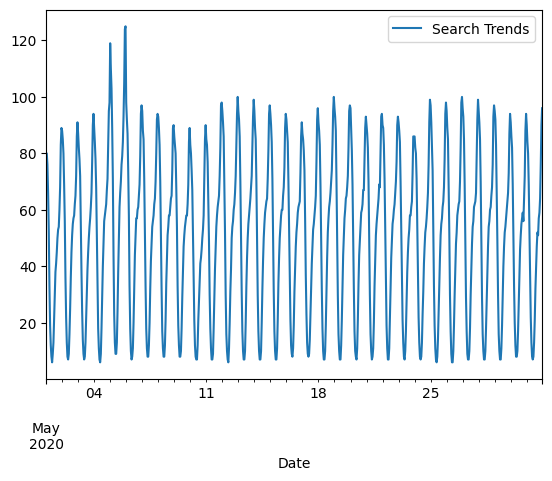

In [322]:
# Slice the DataFrame to just the month of May 2020
trends_05_2020_df = df_mercado_trends["2020-05-01" : "2020-05-31"]
trends_05_2020_df.head()
display(trends_05_2020_df.head())
# Plot to visualize the data for May 2020
trends_05_2020_df.plot()


#### Step 2: Calculate the total search traffic for the month, and then compare the value to the monthly median across all months. Did the Google search traffic increase during the month that MercadoLibre released its financial results?

In [323]:
# Calculate the sum of the Total Search Traffic for May 2020
# Interpretation: Sum up the Total Search Traffic for the month of may, this should return the sum of all trends for the month
traffic_may_2020 = trends_05_2020_df.sum()


# View the traffic_may_2020 value
traffic_may_2020


,0
Search Trends,38181


In [324]:
# Calcluate the monthly median search traffic across all months
# Group the DataFrame by index year and then index month, chain the sum and then the median functions
# Interpretation: Sum up all the mercado_trends for the entire data set, indexed by year and then month.  Then return the aggregated median of the summed dataset by year and month.
median_monthly_traffic = df_mercado_trends.groupby([df_mercado_trends.index.year, df_mercado_trends.index.month]).sum().median()

# View the median_monthly_traffic value
median_monthly_traffic

,0
Search Trends,35172.5


In [325]:
# Compare the seach traffic for the month of May 2020 to the overall monthly median value
traffic_may_2020/median_monthly_traffic

,0
Search Trends,1.085536


##### Answer the following question:

**Question:** Did the Google search traffic increase during the month that MercadoLibre released its financial results?

**Answer:**

## Step 2: Mine the Search Traffic Data for Seasonality

Marketing realizes that they can use the hourly search data, too. If they can track and predict interest in the company and its platform for any time of day, they can focus their marketing efforts around the times that have the most traffic. This will get a greater return on investment (ROI) from their marketing budget.

To that end, you want to mine the search traffic data for predictable seasonal patterns of interest in the company. To do so, complete the following steps:

1. Group the hourly search data to plot the average traffic by the hour of day. Does the search traffic peak at a particular time of day or is it relatively consistent?

2. Group the hourly search data to plot the average traffic by the day of the week (for example, Monday vs. Friday). Does the search traffic get busiest on any particular day of the week?

3. Group the hourly search data to plot the average traffic by the week of the year. Does the search traffic tend to increase during the winter holiday period (weeks 40 through 52)?


#### Step 1: Group the hourly search data to plot the average traffic by the ***hour of the day***.

,Search Trends
Hour,
0,88.324289
1,84.408150
2,76.419793
3,61.954075
4,43.720569
5,26.406856
6,14.459897
7,8.371928
8,6.150712


<Axes: xlabel='Hour'>

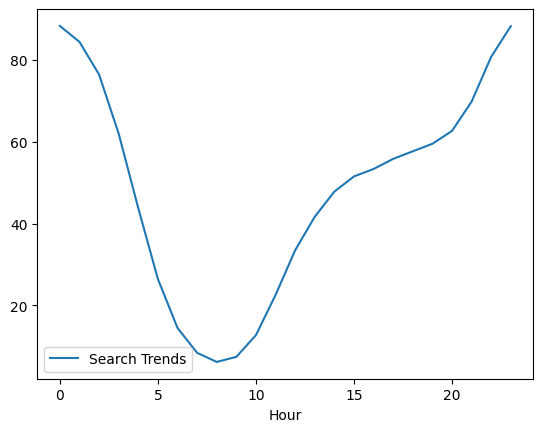

In [326]:
# Group the hourly search data to plot the average traffic by the day of week, using `df.index.hour`df_mercado_trends
# Interpretation: Groups the hourly search trend data to calculate and visualize the average search traffic, across all days of the week included in the data set.
# NOTE: The date column should be renamed to hours, since it now represents hour intervals (e.g., 0 for 12:00 AM, 1 for 1:00 AM, and so on).
average_traffic_by_day = df_mercado_trends.groupby([df_mercado_trends.index.hour]).mean()
average_traffic_by_day.index.name = "Hour"
display(average_traffic_by_day)

average_traffic_by_day.plot()

#### Step 2: Group the hourly search data to plot the average traffic by the ***day of the week (for example, Monday vs. Friday)***.

<Axes: xlabel='day'>

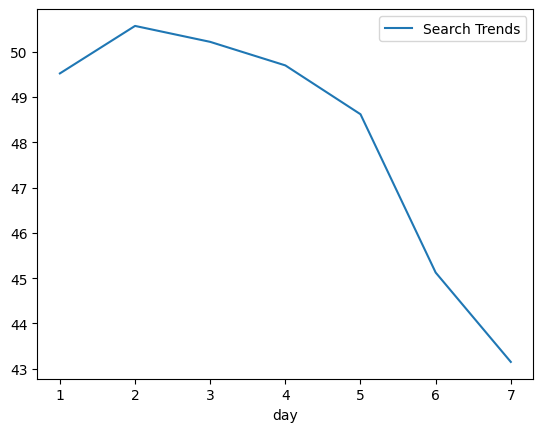

In [327]:
# Group the hourly search data to plot the average traffic by the day of week, using `df.index.isocalendar().day`.
# Interpretation: group the df_mercado_trends by day of the  (using isocalendar().day, which extracts the day of the
# week (1 for Monday through 7 for Sunday) to group the data, if Date contains YYYY-MM-DD), then plot the mean of the days
# Note: The Date is automatically changed to "day"
average_traffic_by_day_of_week = df_mercado_trends.groupby([df_mercado_trends.index.isocalendar().day]).mean()
average_traffic_by_day_of_week.plot()


#### Step 3: Group the hourly search data to plot the average traffic by the ***week of the year***.

<Axes: xlabel='week'>

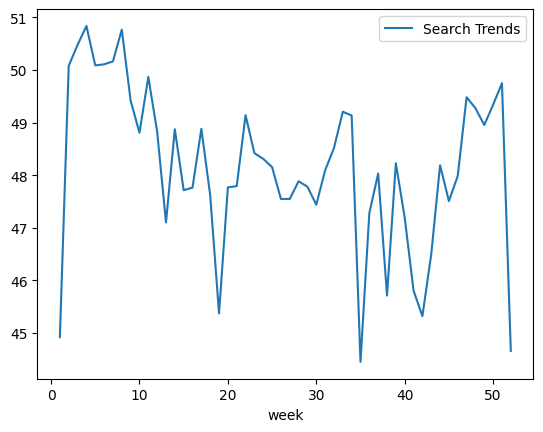

In [328]:
# Group the hourly search data to plot the average traffic by the week of the year using `df.index.isocalendar().week`.
# Interpretation: Group  df_mercado_trends by isocalendar().week (This groups rows in df_mercado_trends based on the ISO
# calendar week number (1 through 52/53)), then calculate and plot the mean
# Note: the Date is change to week automatically
average_traffic_by_week_of_year = df_mercado_trends.groupby([df_mercado_trends.index.isocalendar().week]).mean()
average_traffic_by_week_of_year.plot()


##### Answer the following question:

**Question:** Are there any time based trends that you can see in the data?

**Answer:**
The **average traffic by hours of the day** reflects an upward search trend around 10pm and peak at noon (0). This is followed by a downward trend with 8pm being the "minima."  The data suggests the prime search time is between the hours of 10pm and noon (0). Search results experience a general decline after noon (0) and hit a low at 8pm, as people are consumed by their daily routine.

The **average traffic by day of the week** showls an upward trend on Mondays (1) and Tuesdays (2), while experiencing gradual decline from Tuesday (2) through Thursday (4).  The steepist decline occurs from Friday (5) to Saturday (6), followed by Saturday (6) to Sunday (7).

The **average traffic by the week of the year plot** appears to show an upward seasonal trend in the Winter months that are driven by Thanksgiving, Christmas, New Years, and Valentines day.

**Weeks 1-4:** correspond to January.\
**Weeks 5-8:** correspond to February.\
**Weeks 45-48:** correspond to November.\
**Weeks 49-52:** correspond to December.

## Step 3: Relate the Search Traffic to Stock Price Patterns

You mention your work on the search traffic data during a meeting with people in the finance group at the company. They want to know if any relationship between the search data and the company stock price exists, and they ask if you can investigate.

To do so, complete the following steps:

1. Read in and plot the stock price data. Concatenate the stock price data to the search data in a single DataFrame.

2. Market events emerged during the year of 2020 that many companies found difficult. But, after the initial shock to global financial markets, new customers and revenue increased for e-commerce platforms. Slice the data to just the first half of 2020 (`2020-01` to `2020-06` in the DataFrame), and then plot the data. Do both time series indicate a common trend that’s consistent with this narrative?

3. Create a new column in the DataFrame named “Lagged Search Trends” that offsets, or shifts, the search traffic by one hour. Create two additional columns:

    * “Stock Volatility”, which holds an exponentially weighted four-hour rolling average of the company’s stock volatility

    * “Hourly Stock Return”, which holds the percent change of the company's stock price on an hourly basis

4. Review the time series correlation, and then answer the following question: Does a predictable relationship exist between the lagged search traffic and the stock volatility or between the lagged search traffic and the stock price returns?


#### Step 1: Read in and plot the stock price data. Concatenate the stock price data to the search data in a single DataFrame.

In [329]:
# Upload the "mercado_stock_price.csv" file into Colab, then store in a Pandas DataFrame
# Set the "date" column as the Datetime Index.
df_mercado_stock = pd.read_csv(
    "https://static.bc-edx.com/ai/ail-v-1-0/m8/lms/datasets/mercado_stock_price.csv",
    index_col="date",
    parse_dates=True
).dropna()

# View the first and last five rows of the DataFrame
display(df_mercado_stock.head())
display(df_mercado_stock.tail())

,close
date,
2015-01-02 09:00:00,127.67
2015-01-02 10:00:00,125.44
2015-01-02 11:00:00,125.57
2015-01-02 12:00:00,125.40
2015-01-02 13:00:00,125.17


,close
date,
2020-07-31 11:00:00,1105.780
2020-07-31 12:00:00,1087.925
2020-07-31 13:00:00,1095.800
2020-07-31 14:00:00,1110.650
2020-07-31 15:00:00,1122.510


<Axes: xlabel='date'>

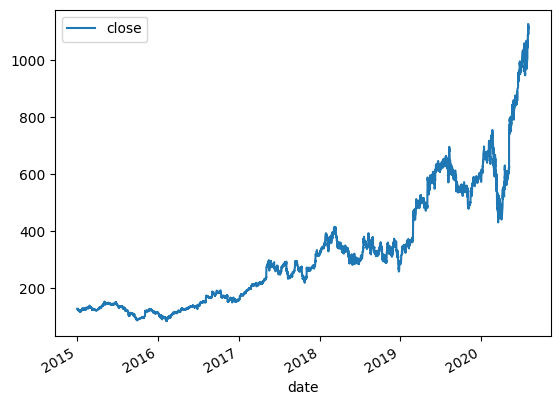

In [330]:
# Visualize the closing price of the df_mercado_stock DataFrame
df_mercado_stock.plot()

In [331]:
# Concatenate the df_mercado_stock DataFrame with the df_mercado_trends (search trends) DataFrame side-by-side
# Concatenate the DataFrame by columns (axis=1), and drop any rows with only one column of data
mercado_stock_trends_df = pd.concat([df_mercado_stock, df_mercado_trends], axis=1, join='inner').dropna()

# Convert the Search Trends to float
mercado_stock_trends_df = mercado_stock_trends_df.astype({"Search Trends" : float});

# View the first and last five rows of the DataFrame
display(mercado_stock_trends_df.info())
display(mercado_stock_trends_df.head())
display(mercado_stock_trends_df.tail())

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 7067 entries, 2016-06-01 09:00:00 to 2020-07-31 15:00:00
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   close          7067 non-null   float64
 1   Search Trends  7067 non-null   float64
dtypes: float64(2)
memory usage: 165.6 KB


None

,close,Search Trends
2016-06-01 09:00:00,135.16,6.0
2016-06-01 10:00:00,136.63,12.0
2016-06-01 11:00:00,136.56,22.0
2016-06-01 12:00:00,136.42,33.0
2016-06-01 13:00:00,136.10,40.0


,close,Search Trends
2020-07-31 11:00:00,1105.780,20.0
2020-07-31 12:00:00,1087.925,32.0
2020-07-31 13:00:00,1095.800,41.0
2020-07-31 14:00:00,1110.650,47.0
2020-07-31 15:00:00,1122.510,53.0


#### Step 2: Market events emerged during the year of 2020 that many companies found difficult. But, after the initial shock to global financial markets, new customers and revenue increased for e-commerce platforms. Slice the data to just the first half of 2020 (`2020-01` to `2020-06` in the DataFrame), and then plot the data. Do both time series indicate a common trend that’s consistent with this narrative?

In [332]:
# For the combined dataframe, slice to just the first half of 2020 (2020-01 through 2020-06)
first_half_2020_df = mercado_stock_trends_df.loc["2020-01" : "2020-06"]

# View the first and last five rows of first_half_2020 DataFrame
df = first_half_2020_df.loc["2020-01-15":"2020-03-30"]
# disable max_row limit
# pd.set_option('display.max_rows', None)
print(df)
# Reset the option to default to avoid unintended effects later
pd.reset_option('display.max_rows')
# display(first_half_2020_df.tail(100))

                       close  Search Trends
2020-01-15 09:00:00  656.210            9.0
2020-01-15 10:00:00  660.120           15.0
2020-01-15 11:00:00  660.885           26.0
2020-01-15 12:00:00  657.440           39.0
2020-01-15 13:00:00  654.810           51.0
...                      ...            ...
2020-03-30 11:00:00  478.035           16.0
2020-03-30 12:00:00  481.880           27.0
2020-03-30 13:00:00  487.480           37.0
2020-03-30 14:00:00  482.895           45.0
2020-03-30 15:00:00  471.360           53.0

[296 rows x 2 columns]


array([<Axes: >, <Axes: >], dtype=object)

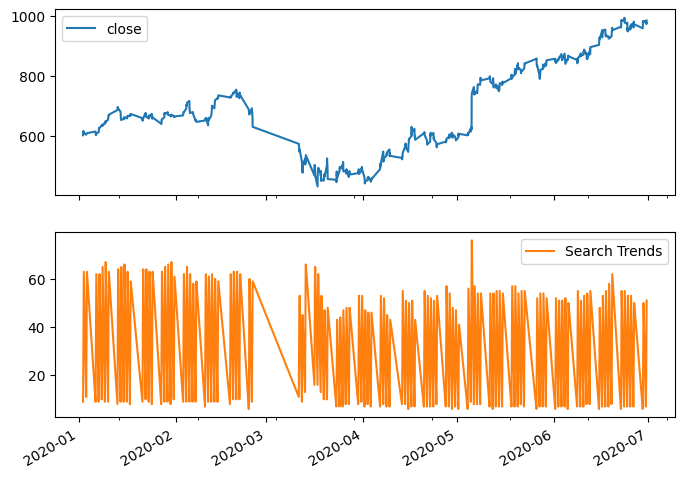

In [333]:
# Visualize the close and Search Trends data
# Plot each column on a separate axes using the following syntax
# `plot(subplots=True)`
first_half_2020_df.plot(subplots=True, figsize=(8, 6))


##### Answer the following question:

**Question:** Market events emerged during the year of 2020 that many companies found difficult. But, after the initial shock to global financial markets, new customers and revenue increased for e-commerce platforms.  Do both time series indicate a common trend that’s consistent with this narrative?

**Answer:** Yes the closing stock price had a sharp down turn starting at 2/21/2020, which reached "minima" at 3/24/2020 at 9 am. This downward trend is also present in the closing stock price during this time period.  However, both plots show a consistent upward trend, with the stock price rebounding after this inital dip.

#### Step 3: Create a new column in the DataFrame named “Lagged Search Trends” that offsets, or shifts, the search traffic by one hour. Create two additional columns:

* “Stock Volatility”, which holds an exponentially weighted four-hour rolling average of the company’s stock volatility

* “Hourly Stock Return”, which holds the percent change of the company's stock price on an hourly basis


In [334]:
# Create a new column in the mercado_stock_trends_df DataFrame called Lagged Search Trends
# This column should shift the Search Trends information by one hour
mercado_stock_trends_df["Lagged Search Trends"] = mercado_stock_trends_df["Search Trends"].shift(1)
mercado_stock_trends_df.head()

,close,Search Trends,Lagged Search Trends
2016-06-01 09:00:00,135.16,6.0,NaN
2016-06-01 10:00:00,136.63,12.0,6.0
2016-06-01 11:00:00,136.56,22.0,12.0
2016-06-01 12:00:00,136.42,33.0,22.0
2016-06-01 13:00:00,136.10,40.0,33.0


In [335]:
# Create a new column in the mercado_stock_trends_df DataFrame called Stock Volatility
# This column should calculate the standard deviation of percent_change of the closing stock price returning data over a 4 (Hours) period rolling window
mercado_stock_trends_df["Stock Volatility"] = mercado_stock_trends_df["close"].pct_change().rolling(window=4).std()
mercado_stock_trends_df.tail()


,close,Search Trends,Lagged Search Trends,Stock Volatility
2020-07-31 11:00:00,1105.780,20.0,11.0,0.012837
2020-07-31 12:00:00,1087.925,32.0,20.0,0.013549
2020-07-31 13:00:00,1095.800,41.0,32.0,0.013295
2020-07-31 14:00:00,1110.650,47.0,41.0,0.013001
2020-07-31 15:00:00,1122.510,53.0,47.0,0.013566


<Axes: >

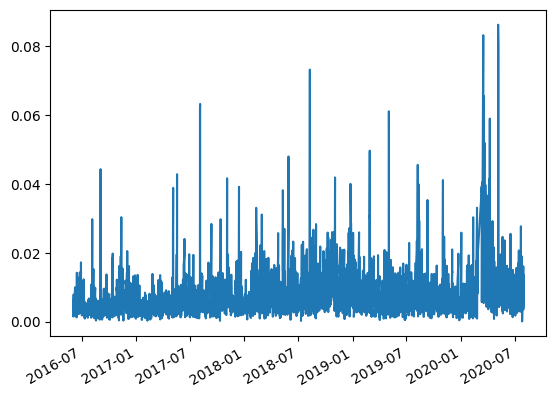

In [336]:
# Visualize the stock volatility
volatility_df = mercado_stock_trends_df["Stock Volatility"]

volatility_df.plot()

**Solution Note:** Note how volatility spiked, and tended to stay high, during the first half of 2020. This is a common characteristic of volatility in stock returns worldwide: high volatility days tend to be followed by yet more high volatility days. When it rains, it pours.

In [337]:
# Create a new column in the mercado_stock_trends_df DataFrame called Hourly Stock Return
# This column should calculate hourly return percentage of the closing price
# Interpretation: The data is segmented by hours, so to calculate the hourly return percentage, just take th pct_change of close
mercado_stock_trends_df["Hourly Stock Return"] = mercado_stock_trends_df["close"].pct_change()


In [338]:
# View the first and last five rows of the mercado_stock_trends_df DataFrame
display(mercado_stock_trends_df.head())
display(mercado_stock_trends_df.tail())

,close,Search Trends,Lagged Search Trends,Stock Volatility,Hourly Stock Return
2016-06-01 09:00:00,135.16,6.0,NaN,NaN,NaN
2016-06-01 10:00:00,136.63,12.0,6.0,NaN,0.010876
2016-06-01 11:00:00,136.56,22.0,12.0,NaN,-0.000512
2016-06-01 12:00:00,136.42,33.0,22.0,NaN,-0.001025
2016-06-01 13:00:00,136.10,40.0,33.0,0.006134,-0.002346


,close,Search Trends,Lagged Search Trends,Stock Volatility,Hourly Stock Return
2020-07-31 11:00:00,1105.780,20.0,11.0,0.012837,0.006380
2020-07-31 12:00:00,1087.925,32.0,20.0,0.013549,-0.016147
2020-07-31 13:00:00,1095.800,41.0,32.0,0.013295,0.007239
2020-07-31 14:00:00,1110.650,47.0,41.0,0.013001,0.013552
2020-07-31 15:00:00,1122.510,53.0,47.0,0.013566,0.010678


#### Step 4: Review the time series correlation, and then answer the following question: Does a predictable relationship exist between the lagged search traffic and the stock volatility or between the lagged search traffic and the stock price returns?

<Axes: >

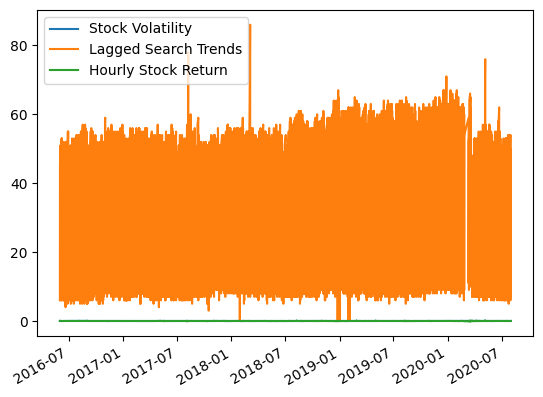

In [339]:
mercado_stock_trends_df[['Stock Volatility', 'Lagged Search Trends', 'Hourly Stock Return']].plot()

In [340]:
# Construct correlation table of Stock Volatility, Lagged Search Trends, and Hourly Stock Return
mercado_stock_trends_df[['Stock Volatility', 'Lagged Search Trends', 'Hourly Stock Return']].corr()

,Stock Volatility,Lagged Search Trends,Hourly Stock Return
Stock Volatility,1.000000,-0.148938,0.061424
Lagged Search Trends,-0.148938,1.000000,0.017929
Hourly Stock Return,0.061424,0.017929,1.000000


##### Answer the following question:


**Question:** Does a predictable relationship exist between the ***lagged search traffic*** and the ***stock volatility*** or between the ***lagged search traffic*** and the ***stock price returns***?

***Correlation Guide:*** rvalue of .45 is a positive correlation, but since less than 1, it is a weaker positive correlation.  If rvalue < 0.3, it is small to no correlation.  Rvalue of .4 to .5, is considered  mild correlation. rvalue of .5 to 1 is considered a strong correlation.

**Answer:** There is little to no correlation between ***Stock Volatility and Lagged Search Trends***.  The correlation can be found by observing the overlapping cells in the dataframe, which indicates -0.14893.  This weak negative (< 0.3) correlation suggests there could be an inverse relationship between the two data points, however, it is not considered significant.

Similarly, there is little to no correlation between ***Lagged Search Trends and Hourly Stock Return***.  The correlation can be found by observing the overlapping cells in the dataframe, which indicates 0.017929.  This weak positive (< 0.3) correlation suggests there could be a slight relationship between the two data points, however, it is not considered significant.

## Step 4: Create a Time Series Model with Prophet

Now, you need to produce a time series model that analyzes and forecasts patterns in the hourly search data. To do so, complete the following steps:

1. Set up the Google search data for a Prophet forecasting model.

2. After estimating the model, plot the forecast. How's the near-term forecast for the popularity of MercadoLibre?

3. Plot the individual time series components of the model to answer the following questions:

    * What time of day exhibits the greatest popularity?

    * Which day of the week gets the most search traffic?

    * What's the lowest point for search traffic in the calendar year?


#### Step 1: Set up the Google search data for a Prophet forecasting model.

In [341]:
# Using the df_mercado_trends DataFrame, reset the index so the date information is no longer the index
df_mercado_trends.reset_index(inplace=True)
display(df_mercado_trends.head())
# Label the columns ds and y so that the syntax is recognized by Prophet
df_mercado_trends.columns = ["ds", "y"]

# Drop an NaN values from the prophet_df DataFrame
df_mercado_trends =df_mercado_trends.dropna()

# View the first and last five rows of the mercado_prophet_df DataFrame
display(df_mercado_trends.head())
display(df_mercado_trends.tail())

,Date,Search Trends
0,2016-06-01 00:00:00,97
1,2016-06-01 01:00:00,92
2,2016-06-01 02:00:00,76
3,2016-06-01 03:00:00,60
4,2016-06-01 04:00:00,38


,ds,y
0,2016-06-01 00:00:00,97
1,2016-06-01 01:00:00,92
2,2016-06-01 02:00:00,76
3,2016-06-01 03:00:00,60
4,2016-06-01 04:00:00,38


,ds,y
37101,2020-09-07 20:00:00,71
37102,2020-09-07 21:00:00,83
37103,2020-09-07 22:00:00,96
37104,2020-09-07 23:00:00,97
37105,2020-09-08 00:00:00,96


In [342]:
# Call the Prophet function, store as an object
prophet_model = Prophet()
prophet_model


In [343]:
# Fit the time-series model.
prophet_model.fit(df_mercado_trends)

DEBUG:cmdstanpy:input tempfile: /tmp/tmpsfjdqj1q/2fsbtiuu.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpsfjdqj1q/gmn1qowc.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=41586', 'data', 'file=/tmp/tmpsfjdqj1q/2fsbtiuu.json', 'init=/tmp/tmpsfjdqj1q/gmn1qowc.json', 'output', 'file=/tmp/tmpsfjdqj1q/prophet_modelo1p5t63x/prophet_model-20241209051625.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
05:16:25 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
05:16:49 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


In [344]:
# Create a future dataframe to hold predictions
# Make the prediction go out as far as 2000 hours (approx 80 days)
future_mercado_trends = prophet_model.make_future_dataframe(periods=2000, freq='H')

# View the last five rows of the future_mercado_trends DataFrame
future_mercado_trends.tail()

/usr/local/lib/python3.10/dist-packages/prophet/forecaster.py:1854: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  dates = pd.date_range(


,ds
39101,2020-11-30 04:00:00
39102,2020-11-30 05:00:00
39103,2020-11-30 06:00:00
39104,2020-11-30 07:00:00
39105,2020-11-30 08:00:00


In [350]:
# Temporarily override max rows to display all rows
# pd.set_option('display.max_rows', None)

# Make the predictions for the trend data using the future_mercado_trends DataFrame
forecast_mercado_trends = prophet_model.predict(future_mercado_trends)

# Display the first five rows of the forecast_mercado_trends DataFrame
# display(forecast_mercado_trends.head())
forecast_mercado_trends[(forecast_mercado_trends['ds'] >= '2020-09-03') & (forecast_mercado_trends['ds'] <= '2020-11-30')]
# forecast_mercado_trends[(forecast_mercado_trends['ds'] >= '2020-10-20') & (forecast_mercado_trends['ds'] <= '2020-10-21')]

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,daily,...,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
36985,2020-09-03 00:00:00,46.716373,79.650823,97.062282,46.716373,46.716373,41.482911,41.482911,41.482911,41.452703,...,2.139139,2.139139,2.139139,-2.108930,-2.108930,-2.108930,0.0,0.0,0.0,88.199284
36986,2020-09-03 01:00:00,46.715636,76.271652,93.648880,46.715636,46.715636,37.977190,37.977190,37.977190,37.943556,...,2.147322,2.147322,2.147322,-2.113688,-2.113688,-2.113688,0.0,0.0,0.0,84.692826
36987,2020-09-03 02:00:00,46.714898,65.624247,82.621948,46.714898,46.714898,27.687932,27.687932,27.687932,27.656646,...,2.149692,2.149692,2.149692,-2.118406,-2.118406,-2.118406,0.0,0.0,0.0,74.402831
36988,2020-09-03 03:00:00,46.714161,50.920468,68.591366,46.714161,46.714161,12.440386,12.440386,12.440386,12.417424,...,2.146046,2.146046,2.146046,-2.123084,-2.123084,-2.123084,0.0,0.0,0.0,59.154547
36989,2020-09-03 04:00:00,46.713424,33.440381,50.745097,46.713424,46.713424,-4.669444,-4.669444,-4.669444,-4.677999,...,2.136277,2.136277,2.136277,-2.127722,-2.127722,-2.127722,0.0,0.0,0.0,42.043980
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39093,2020-11-29 20:00:00,45.162206,48.749338,65.656270,44.105952,46.048580,12.351477,12.351477,12.351477,15.736322,...,-4.400309,-4.400309,-4.400309,1.015464,1.015464,1.015464,0.0,0.0,0.0,57.513683
39094,2020-11-29 21:00:00,45.161469,56.649592,73.629892,44.104101,46.049050,19.750541,19.750541,19.750541,22.843133,...,-4.112530,-4.112530,-4.112530,1.019938,1.019938,1.019938,0.0,0.0,0.0,64.912010
39095,2020-11-29 22:00:00,45.160732,65.296878,81.846973,44.102250,46.048993,28.471003,28.471003,28.471003,31.254717,...,-3.808091,-3.808091,-3.808091,1.024376,1.024376,1.024376,0.0,0.0,0.0,73.631735
39096,2020-11-29 23:00:00,45.159994,72.564738,89.141976,44.100400,46.048937,36.016489,36.016489,36.016489,38.476640,...,-3.488931,-3.488931,-3.488931,1.028780,1.028780,1.028780,0.0,0.0,0.0,81.176484


#### Step 2: After estimating the model, plot the forecast. How's the near-term forecast for the popularity of MercadoLibre?

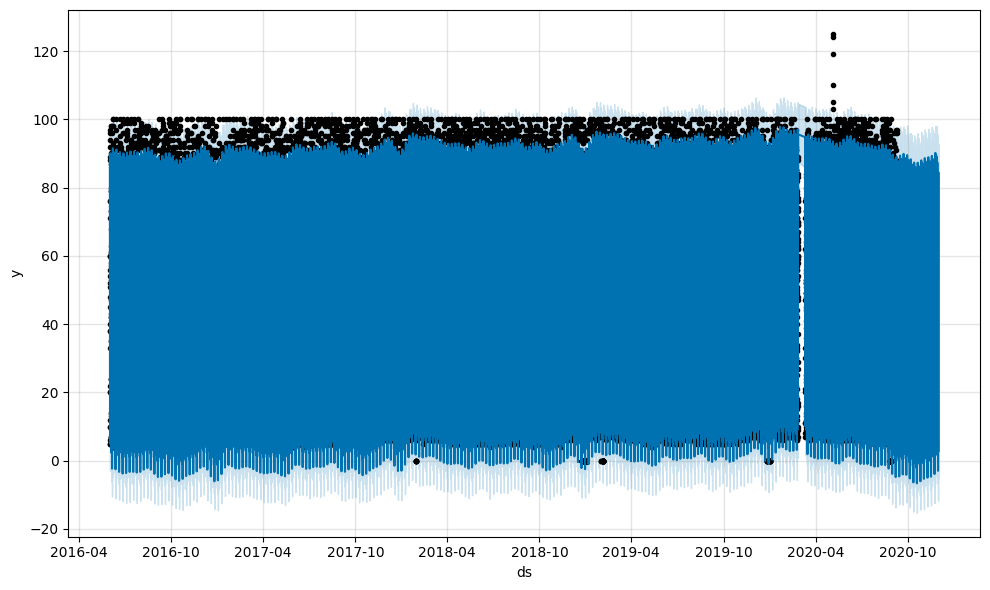

In [346]:
# Plot the Prophet predictions for the Mercado trends data
prophet_model.plot(forecast_mercado_trends);

##### Answer the following question:

**Question:**  How's the near-term forecast for the popularity of MercadoLibre?

**Answer:**
***Mappings*** \
Black dots: Historical data.\
Dark blue: yhat predictions.\
Lighter blue: yhat upper and lower predictions.\

The near-term forecast for MercadoLibre (from 9/8/2020 to 11/30/2020) suggests a ***moderate dip*** in popularity, as indicated by the downward trend of the predicted values (yhat). This decrease is consistent with the prediction interval, shown by the range between yhat_lower and yhat_upper, which captures the uncertainty around the forecasted trend. Despite the dip, the forecast indicates that popularity remains ***fairly stable***, and a ***rebound*** in popularity is expected toward the end of the forecast period (around 11/30/2020), with an upward trend emerging.


#### Step 3: Plot the individual time series components of the model to answer the following questions:

* What time of day exhibits the greatest popularity?

* Which day of the week gets the most search traffic?

* What's the lowest point for search traffic in the calendar year?


In [351]:
# Set the index in the forecast_mercado_trends DataFrame to the ds datetime column
# display(forecast_mercado_trends.head())

# ds is already an index
forecast_mercado_trends = forecast_mercado_trends.set_index("ds")


# View only the yhat,yhat_lower and yhat_upper columns from the DataFrame
yhat = forecast_mercado_trends[["yhat", "yhat_lower", "yhat_upper"]]
yhat.head()


,yhat,yhat_lower,yhat_upper
ds,,,
2016-06-01 00:00:00,89.629222,81.242313,98.199098
2016-06-01 01:00:00,86.075935,76.949009,94.687170
2016-06-01 02:00:00,75.753361,66.784653,84.156434
2016-06-01 03:00:00,60.487045,52.337199,69.140429
2016-06-01 04:00:00,43.373051,34.577664,52.056354


Solutions Note: `yhat` represents the most likely (average) forecast, whereas `yhat_lower` and `yhat_upper` represents the worst and best case prediction (based on what are known as 95% confidence intervals).

<Axes: xlabel='ds'>

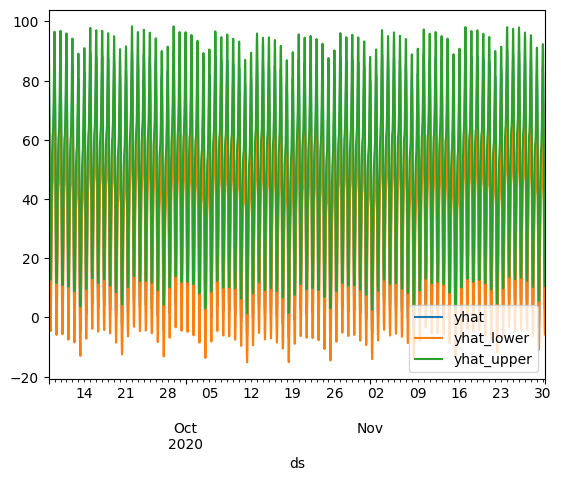

In [352]:
# From the forecast_mercado_trends DataFrame, plot the data to visualize
#  the yhat, yhat_lower, and yhat_upper columns over the last 2000 hours
forecast_mercado_trends[['yhat', 'yhat_lower', 'yhat_upper']].iloc[-2000:,:].plot()

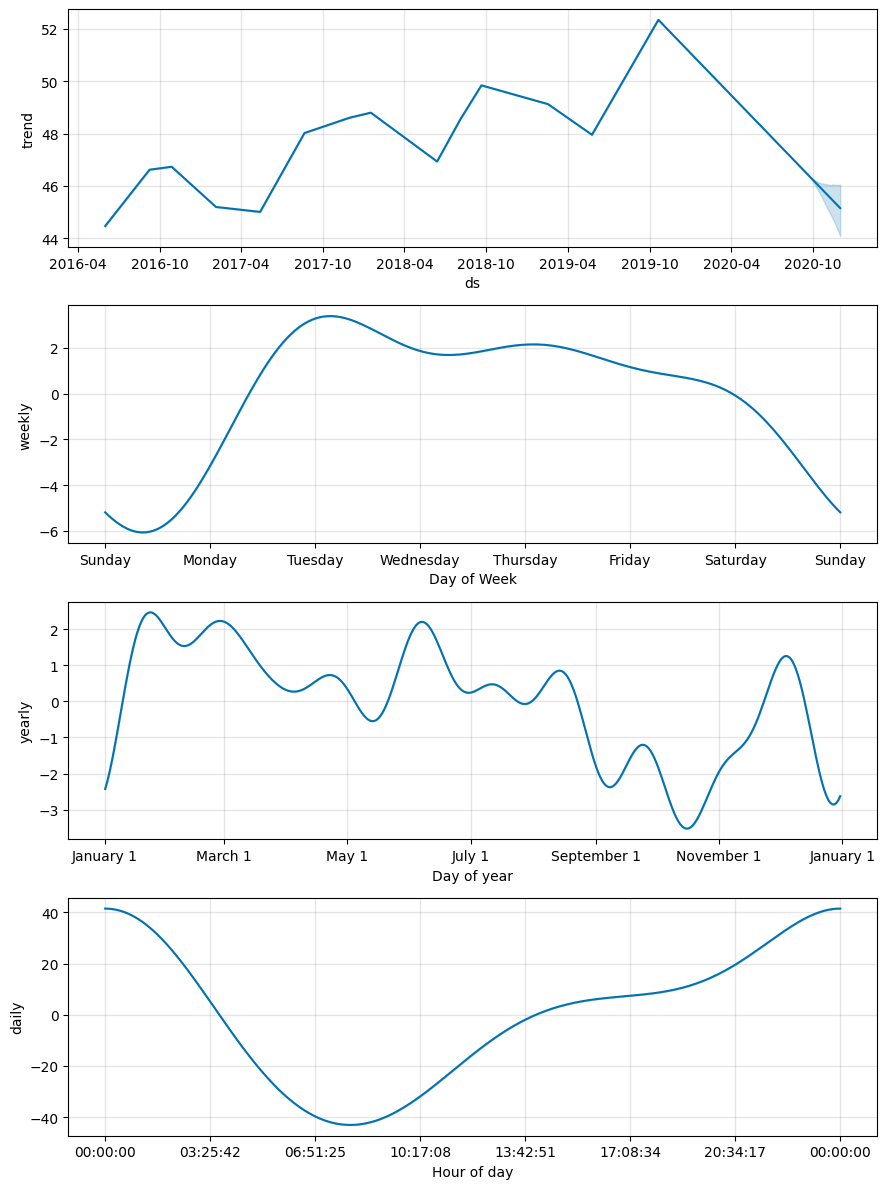

In [354]:
# Reset the index in the forecast_mercado_trends DataFrame
forecast_mercado_trends = forecast_mercado_trends.reset_index()
# Display the columns to verify their names
# print(forecast_mercado_trends.columns)
# display(forecast_mercado_trends.head())

# Use the plot_components function to visualize the forecast results
# for the forecast_mercado_trends DataFrame
fig1 = prophet_model.plot_components(forecast_mercado_trends)

##### Answer the following questions:

**Question:** What time of day exhibits the greatest popularity?

**Answer:** MercadoLibre experiences the greatest popularity at `midnight`, according to the Hour of day component of the `forecast_mercado_trends` future predictions DataFrame.

**Question:** Which day of week gets the most search traffic?
   
**Answer:** MercadoLibre gets the most traffic on `Tuesday`, according to the Day of Week component of the forecast_mercado_trends future predictions DataFrame.

**Question:** What's the lowest point for search traffic in the calendar year?

**Answer:** MercadoLibre experienced the lowest search traffic on `10/20`, according to the Day of Year component of the forecast_mercado_trends future predictions DataFrame.
